In [4]:
import tensorflow as tf
import numpy as np
import cv2
import pathlib
#seaborn
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


dataset_path = r"C:\Users\demir\OneDrive\Belgeler\CS CLUB\archive\Earthquake"
data_dir = pathlib.Path(dataset_path)  # Now pathlib is properly imported


print("Dataset directory set successfully!")

Dataset directory set successfully!


In [5]:
img_h = 224
img_w = 224
batch_size = 32

In [16]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 123,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

Found 2562 files belonging to 2 classes.
Using 2050 files for training.
Found 2562 files belonging to 2 classes.
Using 512 files for validation.


In [17]:
class_names = train_dataset.class_names
print(class_names)

['Damaged Building', 'Undamaged Building']


In [18]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg',
                                                  weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [19]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [20]:
resnet_model.add(pretrained_model)  # Add ResNet backbone
resnet_model.add(Flatten())  # Flatten the output into 1D
resnet_model.add(Dense(512, activation='relu'))  # Fully connected layer
resnet_model.add(Dense(2, activation='softmax'))  # Output layer (2 classes)

In [21]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [22]:
epochs = 10  # Number of training cycles
history = resnet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9060 - loss: 0.2572 - val_accuracy: 0.9785 - val_loss: 0.0638
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9810 - loss: 0.0593 - val_accuracy: 0.9824 - val_loss: 0.0529
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9891 - loss: 0.0260 - val_accuracy: 0.9883 - val_loss: 0.0397
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9900 - loss: 0.0230 - val_accuracy: 0.9863 - val_loss: 0.0420
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9880 - loss: 0.0219 - val_accuracy: 0.9863 - val_loss: 0.0302
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9968 - loss: 0.0069 - val_accuracy: 0.9883 - val_loss: 0.0230
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9902 - val_loss: 0.0306
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9883 - val_loss:

In [23]:
resnet_model.save("/content/building_damage_resnet50.h5")

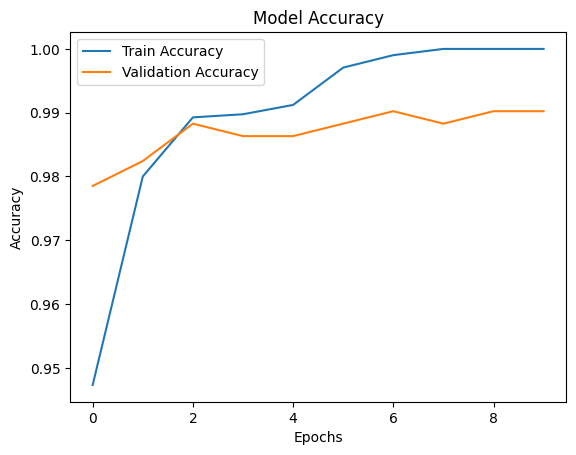

In [24]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


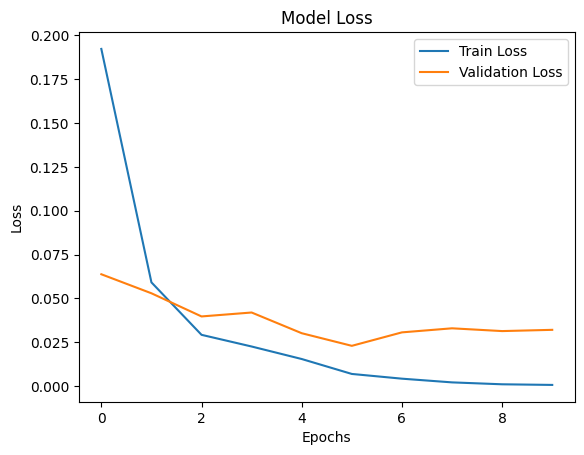

In [25]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [2]:
def predict_building_damage(image_path):
    image = cv2.imread(image_path)  # Load image
    image_resized = cv2.resize(image, (img_h, img_w))  # Resize to 180x180
    image = np.expand_dims(image_resized, axis=0)  # Add batch dimension

    pred = resnet_model.predict(image)  # Predict class probabilities
    output_class = class_names[np.argmax(pred)]  # Get predicted class
    print(f"The predicted class is: {output_class}")


In [3]:
test_image_path = r"C:\Users\demir\OneDrive\Belgeler\CS CLUB\randtest\undamage\2 (1489).jpg"
predict_building_damage(test_image_path)


NameError: name 'cv2' is not defined

In [ ]:
# building detection AI look into
# ask how to save the model as AI
